In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [60]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

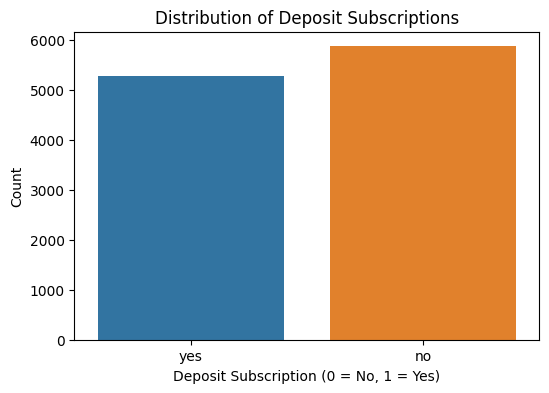

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df)
plt.title('Distribution of Deposit Subscriptions')
plt.xlabel('Deposit Subscription (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### feature engineering

In [62]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [63]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [64]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [65]:
df.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [66]:
df['deposit'].mask(df['deposit'] == 'yes', 1, inplace=True)
df['deposit'].mask(df['deposit'] == 'no', 0, inplace=True)

In [67]:
df['education'].mask(df['education'] == 'unknown', 0, inplace=True)
df['education'].mask(df['education'] == 'primary', 1, inplace=True)
df['education'].mask(df['education'] == 'secondary', 2, inplace=True)
df['education'].mask(df['education'] == 'tertiary', 3, inplace=True)

In [68]:
df['marital'].mask(df['marital'] == 'single', 0, inplace=True)
df['marital'].mask(df['marital'] == 'married', 1, inplace=True)
df['marital'].mask(df['marital'] == 'divorced', 2, inplace=True)

In [69]:
df['poutcome'].mask(df['poutcome'] == 'unknown', 0, inplace=True)
df['poutcome'].mask(df['poutcome'] == 'failure', 1, inplace=True)
df['poutcome'].mask(df['poutcome'] == 'other', 2, inplace=True)
df['poutcome'].mask(df['poutcome'] == 'success', 3, inplace=True)

In [70]:
df['default'].mask(df['default'] == 'yes', 1, inplace=True)
df['default'].mask(df['default'] == 'no', 0, inplace=True)

In [71]:
df['housing'].mask(df['housing'] == 'no', 0, inplace=True)
df['housing'].mask(df['housing'] == 'yes', 1, inplace=True)

In [72]:
df['loan'].mask(df['loan'] == 'no', 0, inplace=True)
df['loan'].mask(df['loan'] == 'yes', 1, inplace=True)

In [73]:
df['contact'].mask(df['contact'] == 'cellular', 1, inplace=True)
df['contact'].mask(df['contact'] == 'unknown', 2, inplace=True)
df['contact'].mask(df['contact'] == 'telephone', 3, inplace=True)

In [74]:
month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
df["month"] = df["month"].map(month)
df["month"].value_counts()

5     2824
8     1519
7     1514
6     1222
11     943
4      923
2      776
10     392
1      344
9      319
3      276
12     110
Name: month, dtype: int64

In [75]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,2,0,2343,1,0,2,5,5,1042,1,-1,0,0,1
1,56,admin.,1,2,0,45,0,0,2,5,5,1467,1,-1,0,0,1
2,41,technician,1,2,0,1270,1,0,2,5,5,1389,1,-1,0,0,1
3,55,services,1,2,0,2476,1,0,2,5,5,579,1,-1,0,0,1
4,54,admin.,1,3,0,184,0,0,2,5,5,673,2,-1,0,0,1


In [76]:
df['deposit'] = pd.to_numeric(df['deposit'], errors='coerce')
df['education'] = pd.to_numeric(df['education'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['poutcome'] = pd.to_numeric(df['poutcome'], errors='coerce')

In [77]:
df = pd.get_dummies(df, columns=["job", "marital", "contact"])

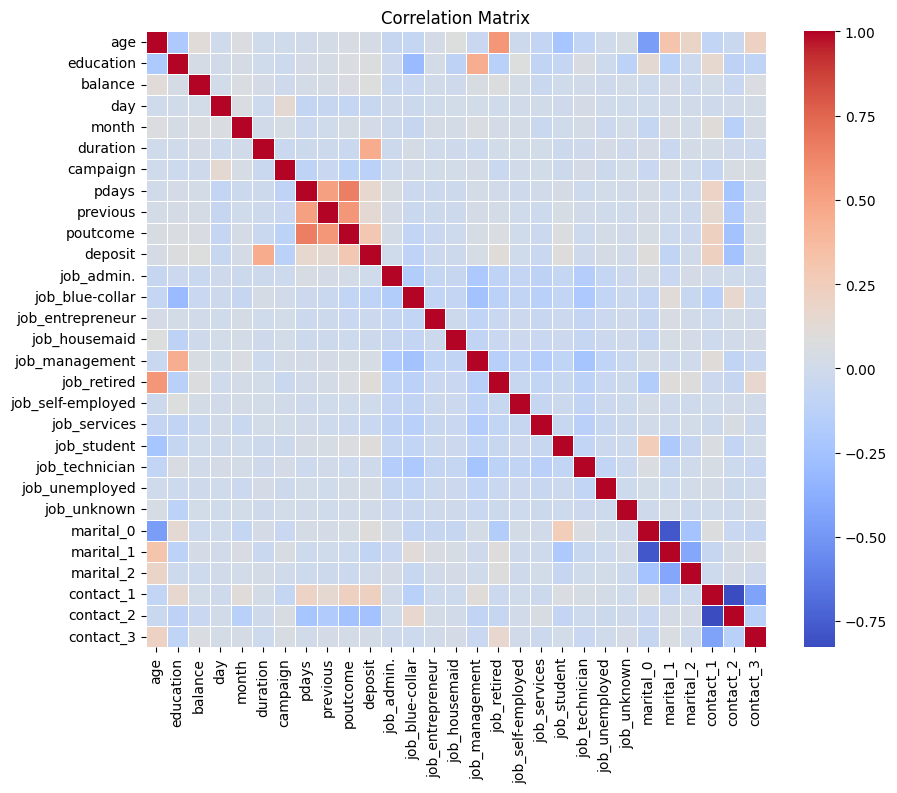

In [90]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Data Splitting

In [79]:
X = df.drop('deposit', axis=1)
y = df['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

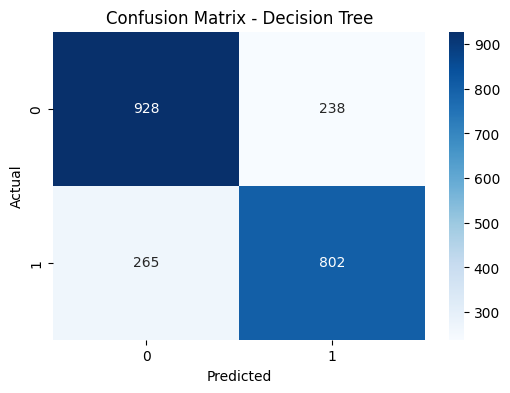

In [81]:
performance_results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    performance_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    
    # Plot Confusion Matrix for the best model (Decision Tree)
    if model_name == 'Decision Tree':
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix - Decision Tree')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [82]:
performance_df = pd.DataFrame(performance_results)
print("Model Performance Summary")
print(performance_df)

Model Performance Summary
                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.774742   0.771154  0.751640  0.761272
1  Logistic Regression  0.791760   0.795678  0.759138  0.776978
2  K-Nearest Neighbors  0.745634   0.738756  0.723524  0.731061
3          Naive Bayes  0.738916   0.731801  0.716026  0.723828


In [83]:
print(performance_df.round(2))  

                 Model  Accuracy  Precision  Recall  F1 Score
0        Decision Tree      0.77       0.77    0.75      0.76
1  Logistic Regression      0.79       0.80    0.76      0.78
2  K-Nearest Neighbors      0.75       0.74    0.72      0.73
3          Naive Bayes      0.74       0.73    0.72      0.72


### Conclusion

- Decision Tree is the best model in terms of accuracy for this dataset, achieving 78%. However, overfitting may be a concern.
- KNN performs well but requires more computational resources, especially for larger datasets.
- Naive Bayes and Logistic Regression are simpler models, yet still competitive, especially if the dataset has a linear or near-linear distribution.